In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [3]:
N = 500
lambda_true = 0.1
np.random.seed(4)
data = np.random.exponential(1/lambda_true, N)
y_true = data.mean()
print(y_true)

10.273480125291353


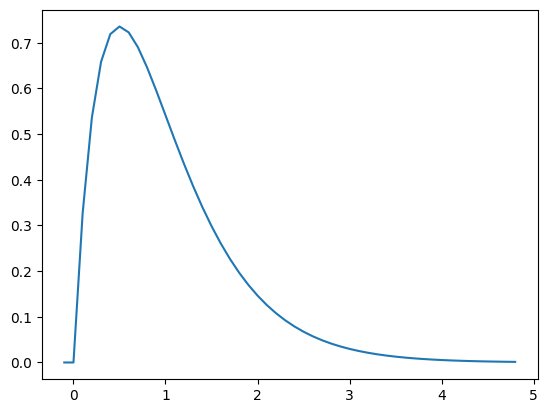

In [12]:
# prior parameters
alpha = 2
beta = 2
# prior visualization
x = np.arange(-0.1, 4.9, .1)
p = gamma.pdf(x, a = alpha, scale = 1/beta)
plt.plot(x, p)
plt.show()


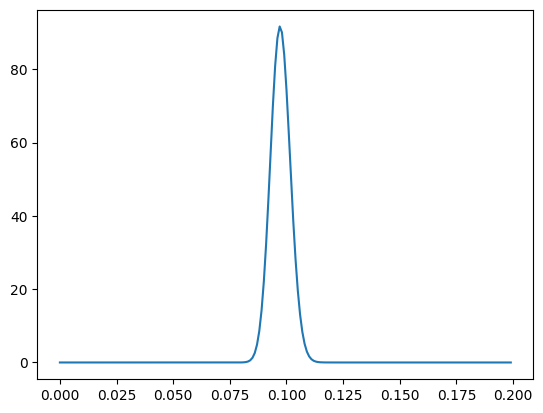

In [5]:
# true posterior visualization
x = np.arange(0, 0.2, .001)
p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
plt.plot(x, p)
plt.show()

In [6]:
def sample_lambda(alpha=0.1, beta=0.1):
    # need prior probability
    return np.random.gamma(alpha, 1/beta)

In [7]:
def rejection_sampler(T, epsilon):
    accepts = np.empty(T)
    attempts = 0
    for t in range(T):
        error = epsilon + 1
        while error >= epsilon:
            lamda = sample_lambda()
            attempts += 1
            y = np.random.exponential(1/lamda, N).mean()
            error = np.sqrt((y - y_true)**2)
            if error < epsilon:
                accepts[t] = lamda
    accept_rate = T / attempts
    print(f"Tolerance: {epsilon}")
    print(f"Acceptance rate: {accept_rate:.6f}")
    return accepts

In [8]:
sample1 = rejection_sampler(100, 0.2)
sample2 = rejection_sampler(100, 0.1)
sample3 = rejection_sampler(100, 0.01)

Tolerance: 0.2
Acceptance rate: 0.002916
Tolerance: 0.1
Acceptance rate: 0.001231
Tolerance: 0.01
Acceptance rate: 0.000129


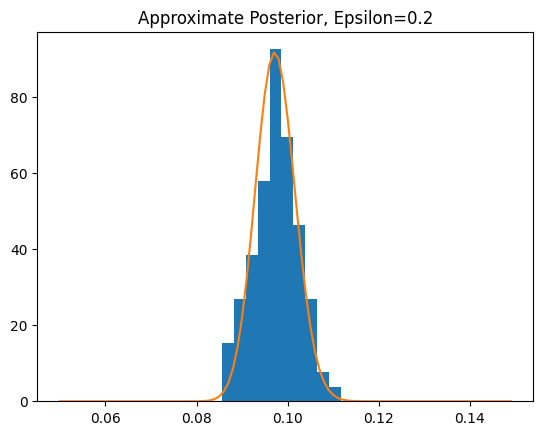

In [9]:
plt.hist(sample1, bins=10, density=True)
x = np.arange(0.05, 0.15, .001)
p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
plt.plot(x, p)
plt.title("Approximate Posterior, Epsilon=0.2")
plt.show()


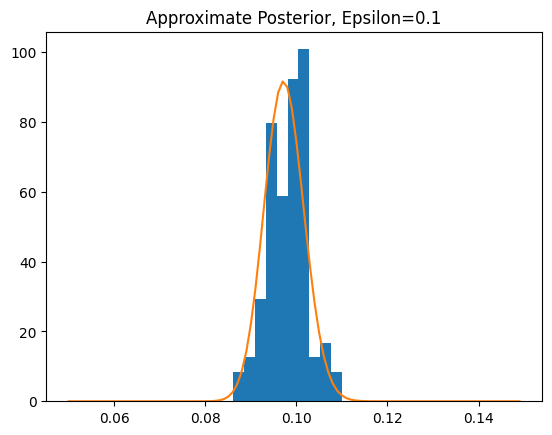

In [10]:
plt.hist(sample2, bins=10, density=True)
x = np.arange(0.05, 0.15, .001)
p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
plt.plot(x, p)
plt.title("Approximate Posterior, Epsilon=0.1")
plt.show()

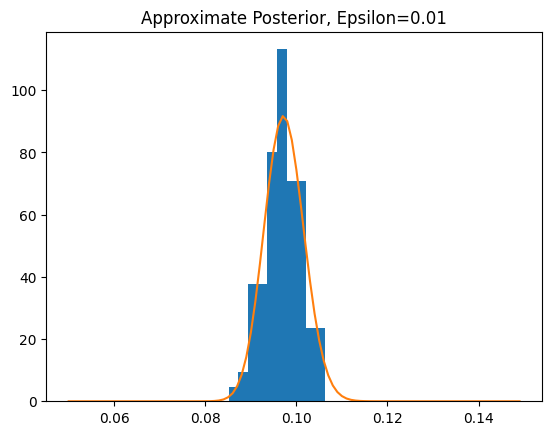

In [11]:
plt.hist(sample3, bins=10, density=True)
x = np.arange(0.05, 0.15, .001)
p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
plt.plot(x, p)
plt.title("Approximate Posterior, Epsilon=0.01")
plt.show()